## Churn Rate Prediction Assignment

The solution is divided into the following sections: 
- Data understanding 
- Data exploration
- Data cleaning
- Data preparation
- Model building and evaluation

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from tabulate import tabulate


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [2]:
# reading the dataset
data =  pd.read_csv('telecom_churn_data.csv')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,...,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,...,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,...,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
# describing the dataset

data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,...,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803,190.337222,9.950013,7.149898,7.292981,6.343841,13.911337,9.818732,9.971890,8.555519,...,0.079641,0.083221,0.081001,0.068781,0.389384,0.439634,0.450075,0.393104,0.075921,0.078581,0.082941,0.086341,0.074781,0.080401,0.084501,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,308.794148,308.951589,308.477668,316.851613,325.862803,327.170662,319.396092,72.825411,73.447948,68.402466,57.137537,71.443196,58.455762,64.713221,58.438186,...,0.295058,0.304395,0.299568,0.278120,1.497320,1.636230,1.630263,1.347140,0.363371,0.387231,0.384947,0.384978,0.568344,0.628334,0.660234,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,6.660000,6.460000,5.330000,34.730000,32.190000,31.630000,27.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,32.330000,32.360000,29.840000,96.310000,91.735000,92.140000,87.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,115.595000,115.860000,112.130000,231.860000,226.815000,228.260000,220.505000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000

In [4]:
# Checking the number of rows and columns in the dataframe
data.shape

(99999, 226)

In [5]:
# Dataset info

data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    mobile_number             99999 non-null  int64  
 1    circle_id                 99999 non-null  int64  
 2    loc_og_t2o_mou            98981 non-null  float64
 3    std_og_t2o_mou            98981 non-null  float64
 4    loc_ic_t2o_mou            98981 non-null  float64
 5    last_date_of_month_6      99999 non-null  object 
 6    last_date_of_month_7      99398 non-null  object 
 7    last_date_of_month_8      98899 non-null  object 
 8    last_date_of_month_9      98340 non-null  object 
 9    arpu_6                    99999 non-null  float64
 10   arpu_7                    99999 non-null  float64
 11   arpu_8                    99999 non-null  float64
 12   arpu_9                    99999 non-null  float64
 13   onnet_mou_6               96062 non-null  fl

In [6]:
# performing opertation on data column's name
data.columns = data.columns.to_series().apply(lambda x: x.strip())
data.columns = data.columns.str.replace(' ', '')

In [7]:
# Creating column name list by types of columns
id_cols = ['mobile_number', 'circle_id']
date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
cat_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']
num_cols = [column for column in data.columns if column not in id_cols + date_cols + cat_cols]

In [8]:
# Dropping the circle_id columns as it is of no use in model building
data = data.drop('circle_id' , axis=1)
data.shape

(99999, 225)

In [9]:
# Dropping the date columns as they are of no use in model building
data = data.drop(date_cols, axis=1)
data.shape

(99999, 213)

In [10]:
# Columns with null values greater than 50%
data.columns[(data.isnull().sum()/len(data)*100) > 50]

Index(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [11]:
# Calculating Null Value percentage

null_cols = data.isnull().sum()/len(data)*100
null_cols[null_cols.sort_values(ascending=False) > 50]

total_rech_data_6     74.846748
total_rech_data_7     74.428744
total_rech_data_8     73.660737
total_rech_data_9     74.077741
max_rech_data_6       74.846748
max_rech_data_7       74.428744
max_rech_data_8       73.660737
max_rech_data_9       74.077741
count_rech_2g_6       74.846748
count_rech_2g_7       74.428744
count_rech_2g_8       73.660737
count_rech_2g_9       74.077741
count_rech_3g_6       74.846748
count_rech_3g_7       74.428744
count_rech_3g_8       73.660737
count_rech_3g_9       74.077741
av_rech_amt_data_6    74.846748
av_rech_amt_data_7    74.428744
av_rech_amt_data_8    73.660737
av_rech_amt_data_9    74.077741
arpu_3g_6             74.846748
arpu_3g_7             74.428744
arpu_3g_8             73.660737
arpu_3g_9             74.077741
arpu_2g_6             74.846748
arpu_2g_7             74.428744
arpu_2g_8             73.660737
arpu_2g_9             74.077741
night_pck_user_6      74.846748
night_pck_user_7      74.428744
night_pck_user_8      73.660737
night_pc

In [12]:
# Columns having Null Values greater than 50% and Dropping them

null_cols_removed = list(null_cols[null_cols.values > 50].index)
data.drop(labels=null_cols_removed,axis=1,inplace=True)
len(null_cols_removed)

36

In [13]:
# Checking remaining columns with null value

null_cols[(null_cols.values < 50) & (null_cols.values > 0)].sort_values(ascending=False)

ic_others_9         7.745077
std_og_t2m_mou_9    7.745077
loc_og_t2m_mou_9    7.745077
std_ic_t2f_mou_9    7.745077
loc_og_t2f_mou_9    7.745077
                      ...   
loc_og_mou_7        3.859039
loc_ic_t2t_mou_7    3.859039
std_og_t2o_mou      1.018010
loc_ic_t2o_mou      1.018010
loc_og_t2o_mou      1.018010
Length: 119, dtype: float64

In [14]:
# listing out all the remaining null columns that need to be imputed

null_cols_impute = list(null_cols[(null_cols.values < 50) & (null_cols.values > 0)].sort_values(ascending=False).index)

In [15]:
data[null_cols_impute].info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 119 columns):
 #    Column            Non-Null Count  Dtype  
---   ------            --------------  -----  
 0    ic_others_9       92254 non-null  float64
 1    std_og_t2m_mou_9  92254 non-null  float64
 2    loc_og_t2m_mou_9  92254 non-null  float64
 3    std_ic_t2f_mou_9  92254 non-null  float64
 4    loc_og_t2f_mou_9  92254 non-null  float64
 5    loc_og_t2c_mou_9  92254 non-null  float64
 6    og_others_9       92254 non-null  float64
 7    loc_og_mou_9      92254 non-null  float64
 8    std_ic_t2t_mou_9  92254 non-null  float64
 9    std_og_t2t_mou_9  92254 non-null  float64
 10   loc_ic_mou_9      92254 non-null  float64
 11   loc_og_t2t_mou_9  92254 non-null  float64
 12   std_og_t2f_mou_9  92254 non-null  float64
 13   loc_ic_t2f_mou_9  92254 non-null  float64
 14   std_og_t2c_mou_9  92254 non-null  float64
 15   std_og_mou_9      92254 non-null  float64
 16   loc_ic_t2m_mou_9  92

In [16]:
# imputing the missing values with Median values for numerical columns

for col in null_cols_impute:
    
    data[col] = data[col].fillna(data[col].median())

In [17]:
# adding new column for average revenue for 6th & 7th month

data['avg_revenue_6_7'] = round(((data['total_rech_amt_6'] + data['total_rech_amt_6'])/2), 2)
data

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_revenue_6_7
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,11.91,...,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58,362.0
1,7001865778,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.840,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,...,0.00,0.00,0.00,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1006,0.00,0.00,0.00,0.00,74.0
2,7001625959,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.590,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,...,0.00,0.00,8.42,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1103,0.00,0.00,4.17,0.00,168.0
3,7001204172,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.010,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,...,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2491,0.00,0.00,0.00,0.00,230.0
4,7000142493,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.880,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,...,0.00,0.00,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1526,0.00,0.00,0.00,0.00,196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,7001548952,0.0,0.0,0.0,18.471,69.161,57.530,29.950,5.40,3.36,5.91,0.00,15.19,54.460,52.79,27.14,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,5.40,...,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3199,0.00,0.00,0.00,0.00,60.0
99995,7000607688,0.0,0.0,0.0,112.201,77.811,79.081,140.835,29.26,18.13,16.06,49.49,100.83,69.010,66.39,56.13,0.0,0.00,0.00,0.95,0.0,0.00,0.00,4.23,28.93,...,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2052,0.00,0.00,0.00,0.00,110.0
99996,7000087541,0.0,0.0,0.0,229.187,0.000,0.000,0.000,1.11,32.33,32.36,29.84,21.04,91.735,92.14,87.29,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.11,...,0.00,0.00,0.00,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,185,0.00,0.00,0.00,0.00,119.0
99997,7000498689,0.0,0.0,0.0,322.991,303.386,606.817,731.010,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,1382.08,2683.30,4177.14,0,0,0,0,1,0,0,0,1,2,4,4,1,0,0,0,478,1445.74,1151.03,1173.18,0.00,381.0


In [18]:
# sorting dataset by avg_revenue_6_7

data.sort_values(by='avg_revenue_6_7', ascending=False)

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_revenue_6_7
38610,7001150960,0.0,0.0,0.0,27731.088,35145.834,33543.624,38805.617,5.69,5.14,7.01,5.64,3231.81,3868.590,3625.43,4247.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.69,...,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,460,0.00,0.00,0.00,0.00,35190.0
33019,7002226643,0.0,0.0,0.0,10955.066,8609.460,13505.996,10787.982,0.00,0.00,0.00,0.00,177.53,58.440,107.03,32.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2567,0.00,0.00,0.00,0.00,18500.0
51314,7000777972,0.0,0.0,0.0,15487.684,14624.089,16040.503,8160.738,0.18,0.00,0.00,0.00,5905.14,5490.280,5836.76,2974.49,0.00,0.00,1.00,0.00,0.00,0.00,139.98,25.86,0.18,...,0.0,821.39,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,289,827.43,261.36,5.82,9.05,17840.0
67717,7002155380,0.0,0.0,0.0,11261.349,16820.145,12533.285,14997.307,9.29,16.61,11.63,24.53,1493.98,1921.290,1498.31,1696.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.29,...,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,374,0.00,0.00,0.00,0.00,13096.0
98208,7001719918,0.0,0.0,0.0,10877.945,6498.408,5880.292,3419.159,147.84,107.26,146.56,120.29,1372.88,818.660,737.66,428.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,147.19,...,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1531,0.00,0.00,0.00,0.00,12795.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55612,7000085815,0.0,0.0,0.0,0.000,954.515,0.000,0.560,0.00,2187.41,0.00,0.94,1.15,448.890,0.00,0.10,6.04,0.36,1.34,1.33,5.23,9.44,0.00,1.04,0.00,...,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,183,0.00,0.00,0.00,0.00,0.0
16707,7001325899,0.0,0.0,0.0,134.000,0.000,0.000,25.410,34.31,32.33,32.36,0.00,96.31,91.735,92.14,11.38,0.00,0.00,0.00,4.15,0.00,0.00,0.00,0.76,11.91,...,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1813,0.00,0.00,0.00,0.00,0.0
65203,7001134764,0.0,0.0,0.0,0.000,0.000,238.960,461.484,0.00,0.00,100.53,671.33,0.00,0.000,157.03,155.74,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,895,0.00,0.00,0.00,0.00,0.0
29337,7000365688,0.0,0.0,0.0,0.000,153.583,277.019,291.792,34.31,269.78,521.06,656.09,96.31,34.510,62.18,68.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.91,...,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,291,0.00,0.00,0.00,0.00,0.0


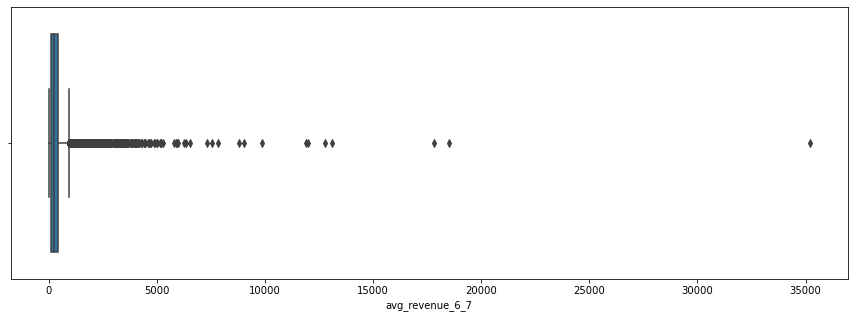

In [19]:
# plotting Boxplot of avg_revenue_6_7

plt.figure(figsize=(15,5))
sns.boxplot(data['avg_revenue_6_7'])
plt.show()

In [20]:
# filtering out high value customers by 70th percentile of recharge amount

df_high_val_cust = data[data['avg_revenue_6_7'] > np.percentile(data['avg_revenue_6_7'],70)].reset_index(drop=True)
df_high_val_cust

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_revenue_6_7
0,7001051193,0.0,0.0,0.0,429.023,190.704,255.114,114.751,71.03,45.03,76.66,15.23,262.73,49.240,92.08,50.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,71.03,...,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1673,0.00,0.00,0.00,0.0,499.0
1,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.84,453.43,567.160,325.91,87.29,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,...,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1580.0
2,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.630,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,...,750.95,11.94,0.00,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,437.0
3,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.280,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,...,0.00,0.00,0.00,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,507.0
4,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,229.740,162.76,224.39,0.00,2.83,0.00,0.00,0.00,17.74,0.00,0.00,42.61,...,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,0.0,570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29967,7001881483,0.0,0.0,0.0,581.397,43.663,262.890,824.724,273.88,3.93,62.64,174.69,722.43,8.530,273.14,602.26,13.04,17.21,17.81,0.00,28.84,12.46,10.49,0.00,96.56,...,0.00,0.00,428.09,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1689,0.00,0.00,0.00,0.0,636.0
29968,7001729035,0.0,0.0,0.0,644.973,455.228,564.334,267.451,806.73,549.36,775.41,692.63,784.76,617.130,595.44,378.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,709.21,...,1129.34,926.78,941.48,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,2696,497.45,598.67,604.08,0.0,567.0
29969,7002111859,0.0,0.0,0.0,312.558,512.932,402.080,533.502,199.89,174.46,2.46,7.16,175.88,277.010,248.33,217.44,0.00,0.00,0.00,63.96,0.00,0.00,0.00,42.44,170.28,...,13.56,678.74,393.34,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,328,104.73,0.00,0.00,0.0,380.0
29970,7000498689,0.0,0.0,0.0,322.991,303.386,606.817,731.010,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1382.08,2683.30,4177.14,0,0,0,0,1,0,0,0,1,2,4,4,1,0,0,0,478,1445.74,1151.03,1173.18,0.0,381.0


In [21]:
# sorting new dataset by avg_revenue_6_7

df_high_val_cust.sort_values(by='avg_revenue_6_7', ascending=False)

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_revenue_6_7
11668,7001150960,0.0,0.0,0.0,27731.088,35145.834,33543.624,38805.617,5.69,5.14,7.01,5.64,3231.81,3868.59,3625.43,4247.38,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,5.69,...,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,460,0.00,0.00,0.00,0.00,35190.0
9991,7002226643,0.0,0.0,0.0,10955.066,8609.460,13505.996,10787.982,0.00,0.00,0.00,0.00,177.53,58.44,107.03,32.43,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2567,0.00,0.00,0.00,0.00,18500.0
15459,7000777972,0.0,0.0,0.0,15487.684,14624.089,16040.503,8160.738,0.18,0.00,0.00,0.00,5905.14,5490.28,5836.76,2974.49,0.0,0.00,1.00,0.00,0.0,0.00,139.98,25.86,0.18,...,0.00,821.39,0.00,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,289,827.43,261.36,5.82,9.05,17840.0
20315,7002155380,0.0,0.0,0.0,11261.349,16820.145,12533.285,14997.307,9.29,16.61,11.63,24.53,1493.98,1921.29,1498.31,1696.69,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,9.29,...,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,374,0.00,0.00,0.00,0.00,13096.0
29443,7001719918,0.0,0.0,0.0,10877.945,6498.408,5880.292,3419.159,147.84,107.26,146.56,120.29,1372.88,818.66,737.66,428.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,147.19,...,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1531,0.00,0.00,0.00,0.00,12795.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5778,7000931393,0.0,0.0,0.0,64.918,242.240,304.517,150.724,71.94,92.13,76.58,40.93,85.36,154.78,265.78,143.21,0.0,0.00,29.98,0.00,0.0,0.00,81.28,0.00,4.83,...,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1722,0.00,0.00,0.00,0.00,379.0
2001,7001996339,0.0,0.0,0.0,260.428,654.635,1472.144,455.743,80.69,146.21,113.63,88.76,525.09,720.89,491.49,408.49,0.0,0.00,5.11,48.89,0.0,0.00,16.66,70.34,53.26,...,1246.46,2575.21,0.00,0,0,0,0,0,0,1,2,0,1,2,0,0,0,0,1,218,759.41,237.39,1228.44,0.00,379.0
24072,7001310754,0.0,0.0,0.0,341.918,319.096,258.105,347.023,126.88,166.96,117.81,85.14,399.48,300.56,351.23,309.16,0.0,83.04,22.38,19.35,0.0,6.61,2.03,3.18,111.54,...,0.00,0.00,0.00,0,0,0,0,5,3,3,4,0,0,0,0,0,0,0,0,3651,0.00,0.00,0.00,0.00,379.0
10011,7001897166,0.0,0.0,0.0,293.806,203.516,258.816,96.770,82.73,69.03,58.26,78.28,78.43,80.03,80.74,119.01,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,82.73,...,89.61,0.00,0.00,0,0,0,0,2,1,2,0,0,0,0,1,0,0,0,0,2905,0.00,59.85,0.00,0.00,379.0


In [22]:
# Checking the number of rows and columns in the new dataframe

df_high_val_cust.shape

(29972, 178)

In [23]:
# Checking info for high_value_customers dataset

df_high_val_cust.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29972 entries, 0 to 29971
Data columns (total 178 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    mobile_number       29972 non-null  int64  
 1    loc_og_t2o_mou      29972 non-null  float64
 2    std_og_t2o_mou      29972 non-null  float64
 3    loc_ic_t2o_mou      29972 non-null  float64
 4    arpu_6              29972 non-null  float64
 5    arpu_7              29972 non-null  float64
 6    arpu_8              29972 non-null  float64
 7    arpu_9              29972 non-null  float64
 8    onnet_mou_6         29972 non-null  float64
 9    onnet_mou_7         29972 non-null  float64
 10   onnet_mou_8         29972 non-null  float64
 11   onnet_mou_9         29972 non-null  float64
 12   offnet_mou_6        29972 non-null  float64
 13   offnet_mou_7        29972 non-null  float64
 14   offnet_mou_8        29972 non-null  float64
 15   offnet_mou_9        29972 non-null

In [24]:
print("Number of rows before filtering the high value customers =", len(data))

Number of rows before filtering the high value customers = 99999


In [25]:
print("Number of rows after filtering the high value customers =", len(df_high_val_cust))

Number of rows after filtering the high value customers = 29972


In [26]:
#  total incoming and outgoing minutes of usage
df_high_val_cust['total_calls_mou_9'] = df_high_val_cust.total_ic_mou_9 + df_high_val_cust.total_og_mou_9

In [27]:
#  total consumption 2g and 3g data
df_high_val_cust['total_internet_mb_9'] =  df_high_val_cust.vol_2g_mb_9 + df_high_val_cust.vol_3g_mb_9

### We need to tag churned customers based on following criteria
- Those who have not made any calls (either incoming or outgoing)
- Those who have not used mobile internet even once in the churn phase

In [28]:
# Those who have not used either calls or internet in September are churned customers

# Let's denote 0 as not churn and  1 as churn

df_high_val_cust['churn'] = df_high_val_cust.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [29]:
# verifying churned customers are tagged correctly
df_high_val_cust[['mobile_number','total_calls_mou_9','total_internet_mb_9','churn']].head()

,mobile_number,total_calls_mou_9,total_internet_mb_9,churn
0,7001051193,2638.40,0.0,0
1,7000701601,0.00,0.0,1
2,7001524846,177.09,0.0,0
3,7002191713,1077.95,0.0,0
4,7000875565,590.30,0.0,0


In [30]:
# assigning correct dtype to churn variable
df_high_val_cust.churn = df_high_val_cust.churn.astype("category")
df_high_val_cust.churn.dtype

CategoricalDtype(categories=[0, 1], ordered=False)

#### Now the target variable has been defined as churned customers

#### Now we can remove all the attributes corresponding to the churn phase or have '_9' in their column name

In [31]:
# finding all the columns which has _9 in their name
cols_month_9 = df_high_val_cust.filter(regex='9$', axis=1).columns
print("The columns names ends with _9 are given below...")
cols_month_9

The columns names ends with _9 are given below...


Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9',
       'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9',
       'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9',
       'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'total_calls_mou_9',
       'total_internet_mb_9'],
      dtype='object')

In [32]:
# removing all the columns that are related to churn month (9th month)

df_high_val_cust = df_high_val_cust.drop(cols_month_9, axis=1)

In [33]:
# check dataset once again
df_high_val_cust.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,...,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_revenue_6_7,churn
0,7001051193,0.0,0.0,0.0,429.023,190.704,255.114,71.03,45.03,76.66,262.73,49.24,92.08,0.00,0.00,0.00,0.00,0.00,0.00,71.03,45.03,76.14,252.23,48.71,80.63,...,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1673,0.00,0.00,0.00,0.0,499.0,0
1,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,...,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1580.0,1
2,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,...,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,437.0,0
3,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,...,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,507.0,0
4,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,...,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,0.0,570.0,0


In [34]:
# setting mobile number as index
df_high_val_cust = df_high_val_cust.set_index('mobile_number')
df_high_val_cust.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,...,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_revenue_6_7,churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7001051193,0.0,0.0,0.0,429.023,190.704,255.114,71.03,45.03,76.66,262.73,49.24,92.08,0.00,0.00,0.00,0.00,0.00,0.00,71.03,45.03,76.14,252.23,48.71,80.63,10.38,...,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1673,0.00,0.00,0.00,0.0,499.0,0
7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,...,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1580.0,1
7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,...,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,437.0,0
7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,...,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,507.0,0
7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,...,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,0.0,570.0,0


In [35]:
# Checking the shape of high value customers df
print("Shape of high value customer dataset : ", df_high_val_cust.shape)

print("No of datapoint after removing unnecessary columns : ", df_high_val_cust.shape[0])
print("No of features after removing unnecessary columns : ",  df_high_val_cust.shape[1])

Shape of high value customer dataset :  (29972, 136)
No of datapoint after removing unnecessary columns :  29972
No of features after removing unnecessary columns :  136


### Plotting monthly 2g and 3g consumption for month ( june , july , august ) against Churn

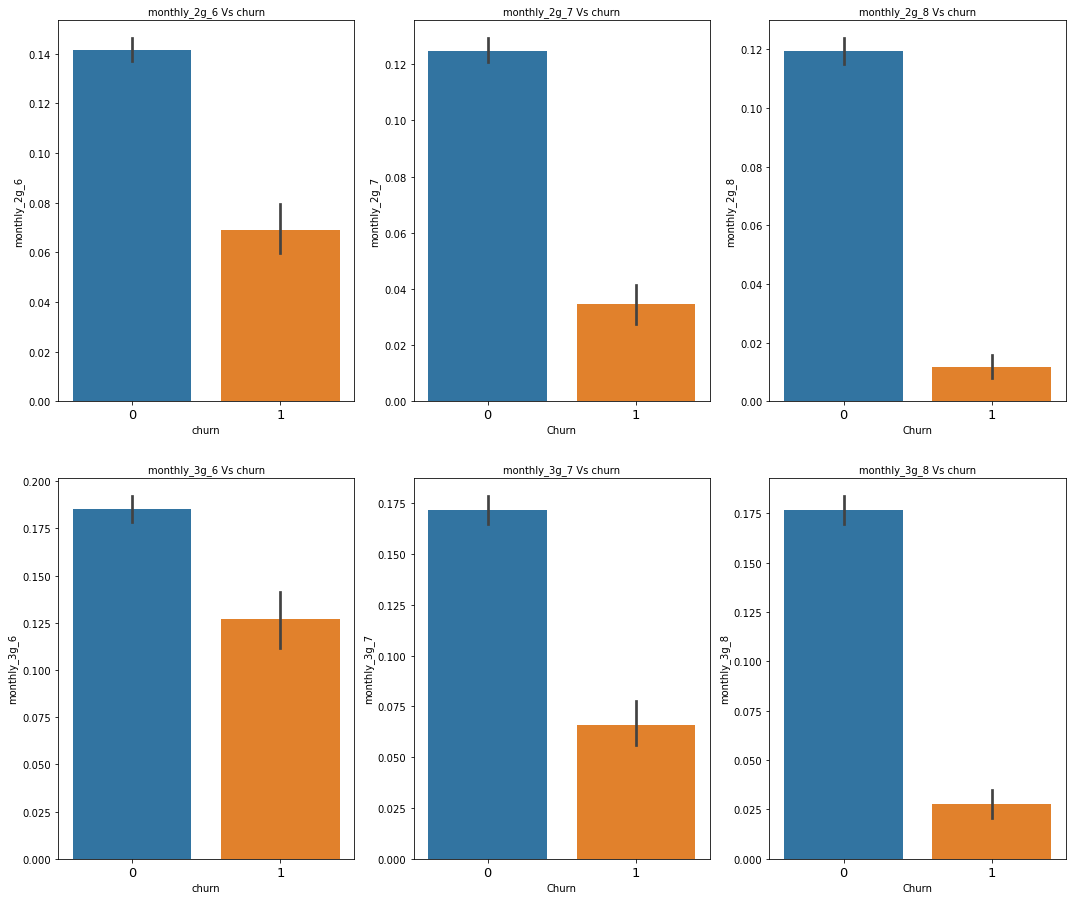

In [36]:
plt.figure(figsize=(14,6))
plt.subplots_adjust(left=0, bottom=2, right=1, top=5, wspace=None, hspace=None)

# monthly_2g_6
plt.subplot(3, 3, 1)
sns.barplot(x=df_high_val_cust['churn'], y =df_high_val_cust['monthly_2g_6']  , data=df_high_val_cust)
plt.title('monthly_2g_6 Vs churn', fontsize = 10)
plt.xlabel("churn", fontsize =10)
plt.ylabel("monthly_2g_6", fontsize = 10)
plt.xticks(fontsize = 13)



# monthly_2g_7
plt.subplot(3, 3, 2)
sns.barplot(x=df_high_val_cust['churn'], y =df_high_val_cust['monthly_2g_7']  , data=df_high_val_cust)
plt.title('monthly_2g_7 Vs churn', fontsize = 10)
plt.xlabel("Churn", fontsize = 10)
plt.ylabel("monthly_2g_7", fontsize = 10)
plt.xticks(fontsize = 13)


# monthly_2g_8
plt.subplot(3, 3, 3)
sns.barplot(x=df_high_val_cust['churn'], y =df_high_val_cust['monthly_2g_8']  , data=df_high_val_cust)
plt.title('monthly_2g_8 Vs churn', fontsize = 10)
plt.xlabel("Churn", fontsize = 10)
plt.ylabel("monthly_2g_8", fontsize = 10)
plt.xticks(fontsize = 13)

# monthly_3g_6
plt.subplot(3, 3, 4)
sns.barplot(x=df_high_val_cust['churn'], y =df_high_val_cust['monthly_3g_6']  , data=df_high_val_cust)
plt.title('monthly_3g_6 Vs churn', fontsize = 10)
plt.xlabel("churn", fontsize =10)
plt.ylabel("monthly_3g_6", fontsize = 10)
plt.xticks(fontsize = 13)



# monthly_3g_7
plt.subplot(3, 3, 5)
sns.barplot(x=df_high_val_cust['churn'], y =df_high_val_cust['monthly_3g_7']  , data=df_high_val_cust)
plt.title('monthly_3g_7 Vs churn', fontsize = 10)
plt.xlabel("Churn", fontsize = 10)
plt.ylabel("monthly_3g_7", fontsize = 10)
plt.xticks(fontsize = 13)


# monthly_3g_8
plt.subplot(3, 3, 6)
sns.barplot(x=df_high_val_cust['churn'], y =df_high_val_cust['monthly_3g_8']  , data=df_high_val_cust)
plt.title('monthly_3g_8 Vs churn', fontsize = 10)
plt.xlabel("Churn", fontsize = 10)
plt.ylabel("monthly_3g_8", fontsize = 10)
plt.xticks(fontsize = 13)

plt.show()

### Plotting average revenue per user for month ( june , july , august ) against Churn

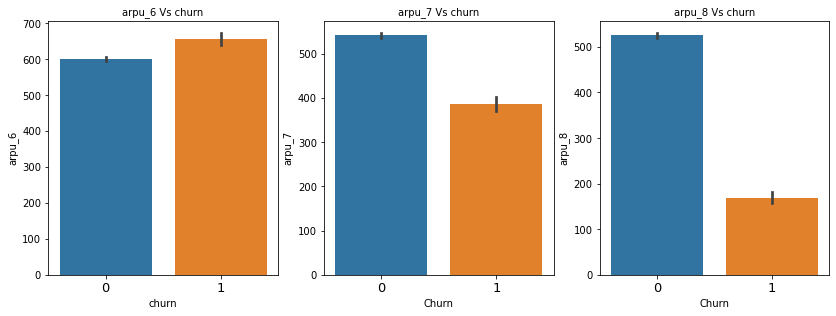

In [37]:
plt.figure(figsize=(14,6))
plt.subplots_adjust(left=None, bottom=3, right=None, top=5, wspace=None, hspace=None)

# arpu_6
plt.subplot(3, 3, 1)
sns.barplot(x=df_high_val_cust['churn'], y =df_high_val_cust['arpu_6']  , data=df_high_val_cust)
plt.title('arpu_6 Vs churn', fontsize = 10)
plt.xlabel("churn", fontsize =10)
plt.ylabel("arpu_6", fontsize = 10)
plt.xticks(fontsize = 13)



# arpu_7
plt.subplot(3, 3, 2)
sns.barplot(x=df_high_val_cust['churn'], y =df_high_val_cust['arpu_7']  , data=df_high_val_cust)
plt.title('arpu_7 Vs churn', fontsize = 10)
plt.xlabel("Churn", fontsize = 10)
plt.ylabel("arpu_7", fontsize = 10)
plt.xticks(fontsize = 13)


# arpu_8
plt.subplot(3, 3, 3)
sns.barplot(x=df_high_val_cust['churn'], y =df_high_val_cust['arpu_8']  , data=df_high_val_cust)
plt.title('arpu_8 Vs churn', fontsize = 10)
plt.xlabel("Churn", fontsize = 10)
plt.ylabel("arpu_8", fontsize = 10)
plt.xticks(fontsize = 13)
plt.show()

### Plotting total outgoing call minute of usage for month ( june , july , august ) against Churn

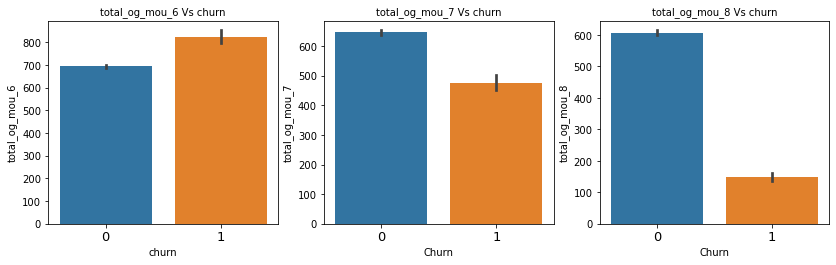

In [38]:
plt.figure(figsize=(14,6))
plt.subplots_adjust(left=None, bottom=3.4, right=None, top=5, wspace=None, hspace=None)

# total_og_mou_6
plt.subplot(3, 3, 1)
sns.barplot(x=df_high_val_cust['churn'], y =df_high_val_cust['total_og_mou_6']  , data=df_high_val_cust)
plt.title('total_og_mou_6 Vs churn', fontsize = 10)
plt.xlabel("churn", fontsize =10)
plt.ylabel("total_og_mou_6", fontsize = 10)
plt.xticks(fontsize = 13)



# total_og_mou_7
plt.subplot(3, 3, 2)
sns.barplot(x=df_high_val_cust['churn'], y =df_high_val_cust['total_og_mou_7']  , data=df_high_val_cust)
plt.title('total_og_mou_7 Vs churn', fontsize = 10)
plt.xlabel("Churn", fontsize = 10)
plt.ylabel("total_og_mou_7", fontsize = 10)
plt.xticks(fontsize = 13)


# total_og_mou_8
plt.subplot(3, 3, 3)
sns.barplot(x=df_high_val_cust['churn'], y =df_high_val_cust['total_og_mou_8']  , data=df_high_val_cust)
plt.title('total_og_mou_8 Vs churn', fontsize = 10)
plt.xlabel("Churn", fontsize = 10)
plt.ylabel("total_og_mou_8", fontsize = 10)
plt.xticks(fontsize = 13)
plt.show()

### Plotting total incoming call minute of usage for month ( june , july , august ) against Churn

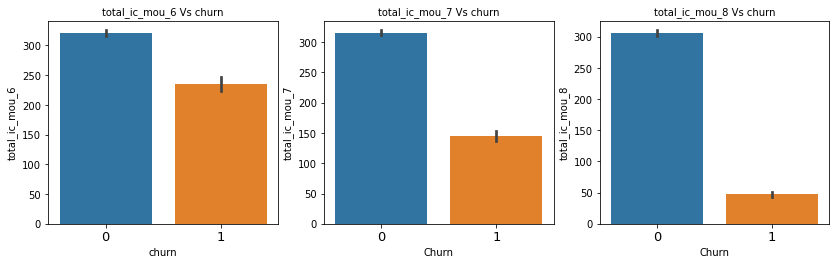

In [39]:
plt.figure(figsize=(14,6))
plt.subplots_adjust(left=None, bottom=3.4, right=None, top=5, wspace=None, hspace=None)

# total_ic_mou_6
plt.subplot(3, 3, 1)
sns.barplot(x=df_high_val_cust['churn'], y =df_high_val_cust['total_ic_mou_6']  , data=df_high_val_cust)
plt.title('total_ic_mou_6 Vs churn', fontsize = 10)
plt.xlabel("churn", fontsize =10)
plt.ylabel("total_ic_mou_6", fontsize = 10)
plt.xticks(fontsize = 13)



# total_ic_mou_6
plt.subplot(3, 3, 2)
sns.barplot(x=df_high_val_cust['churn'], y =df_high_val_cust['total_ic_mou_7']  , data=df_high_val_cust)
plt.title('total_ic_mou_7 Vs churn', fontsize = 10)
plt.xlabel("Churn", fontsize = 10)
plt.ylabel("total_ic_mou_7", fontsize = 10)
plt.xticks(fontsize = 13)


# total_ic_mou_6
plt.subplot(3, 3, 3)
sns.barplot(x=df_high_val_cust['churn'], y =df_high_val_cust['total_ic_mou_8']  , data=df_high_val_cust)
plt.title('total_ic_mou_8 Vs churn', fontsize = 10)
plt.xlabel("Churn", fontsize = 10)
plt.ylabel("total_ic_mou_8", fontsize = 10)
plt.xticks(fontsize = 13)
plt.show()

### Plotting total recharge amout for month ( june , july , august ) against Churn

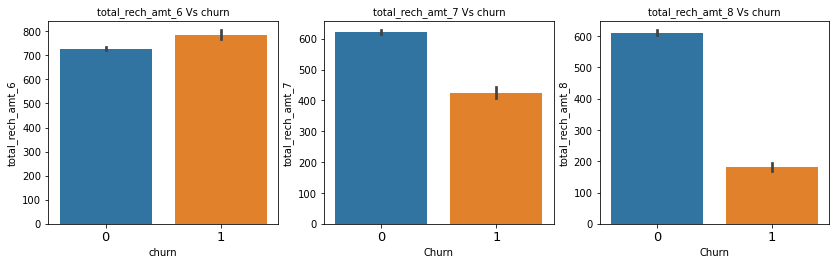

In [40]:
plt.figure(figsize=(14,6))
plt.subplots_adjust(left=None, bottom=3.4, right=None, top=5, wspace=None, hspace=None)

# total_rech_amt_6
plt.subplot(3, 3, 1)
sns.barplot(x=df_high_val_cust['churn'], y =df_high_val_cust['total_rech_amt_6']  , data=df_high_val_cust)
plt.title('total_rech_amt_6 Vs churn', fontsize = 10)
plt.xlabel("churn", fontsize =10)
plt.ylabel("total_rech_amt_6", fontsize = 10)
plt.xticks(fontsize = 13)



# total_rech_amt_7
plt.subplot(3, 3, 2)
sns.barplot(x=df_high_val_cust['churn'], y =df_high_val_cust['total_rech_amt_7']  , data=df_high_val_cust)
plt.title('total_rech_amt_7 Vs churn', fontsize = 10)
plt.xlabel("Churn", fontsize = 10)
plt.ylabel("total_rech_amt_7", fontsize = 10)
plt.xticks(fontsize = 13)


# total_rech_amt_8
plt.subplot(3, 3, 3)
sns.barplot(x=df_high_val_cust['churn'], y =df_high_val_cust['total_rech_amt_8']  , data=df_high_val_cust)
plt.title('total_rech_amt_8 Vs churn', fontsize = 10)
plt.xlabel("Churn", fontsize = 10)
plt.ylabel("total_rech_amt_8", fontsize = 10)
plt.xticks(fontsize = 13)
plt.show()

#### checking top 10 crrelated variables

In [41]:
df_high_val_cust['churn'] = df_high_val_cust['churn'].astype('int64')

In [42]:
num_varss= ['arpu_6','arpu_7', 'arpu_8', 'total_og_mou_6','total_og_mou_7','total_og_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','monthly_2g_6','monthly_2g_7','monthly_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8','churn']

df_high_val_cust[num_varss].corr().nlargest(11, 'churn')

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,churn
churn,0.039873,-0.102000,-0.223223,0.062140,-0.077497,-0.215823,-0.073677,-0.142071,-0.225079,-0.057623,-0.077450,-0.095892,-0.031170,-0.056243,-0.082062,1.000000
total_og_mou_6,0.474959,0.340326,0.237785,1.000000,0.710868,0.557401,0.100459,0.059576,0.034640,-0.126386,-0.096554,-0.097832,-0.120494,-0.091040,-0.088506,0.062140
arpu_6,1.000000,0.711188,0.633855,0.474959,0.348594,0.284747,0.163554,0.136655,0.123791,-0.004236,0.003264,-0.004672,0.214725,0.162734,0.160345,0.039873
monthly_3g_6,0.214725,0.145344,0.137006,-0.120494,-0.093218,-0.073976,0.011848,0.022938,0.029602,-0.043344,0.004752,-0.000871,1.000000,0.650787,0.594221,-0.031170
monthly_3g_7,0.162734,0.257892,0.187228,-0.091040,-0.056814,-0.039052,0.033164,0.060439,0.061540,-0.009510,-0.040640,-0.015967,0.650787,1.000000,0.673954,-0.056243
monthly_2g_6,-0.004236,-0.015909,-0.000448,-0.126386,-0.096099,-0.078738,0.047597,0.050083,0.054927,1.000000,0.564570,0.520354,-0.043344,-0.009510,0.010916,-0.057623
total_ic_mou_6,0.163554,0.135801,0.133052,0.100459,0.058239,0.060572,1.000000,0.791590,0.704807,0.047597,0.058985,0.056883,0.011848,0.033164,0.037282,-0.073677
monthly_2g_7,0.003264,0.054184,0.046477,-0.096554,-0.060196,-0.039812,0.058985,0.071094,0.084532,0.564570,1.000000,0.555163,0.004752,-0.040640,0.021328,-0.077450
total_og_mou_7,0.348594,0.548528,0.400943,0.710868,1.000000,0.764347,0.058239,0.159617,0.124599,-0.096099,-0.060196,-0.063441,-0.093218,-0.056814,-0.056821,-0.077497
monthly_3g_8,0.160345,0.194709,0.270792,-0.088506,-0.056821,-0.025767,0.037282,0.061313,0.077014,0.010916,0.021328,-0.036712,0.594221,0.673954,1.000000,-0.082062


### Plotting correlations on a heatmap

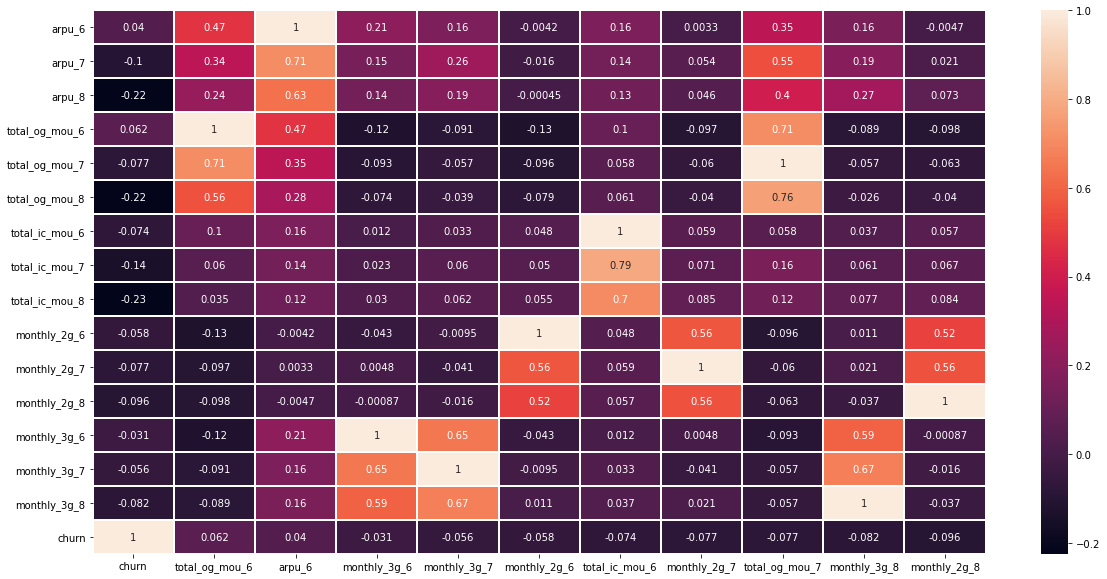

In [43]:
# heatmap of top 10 related variables to target variable

# figure size
plt.figure(figsize=(20,10))

# heatmap
sns.heatmap((df_high_val_cust[num_varss].corr().nlargest(11, 'churn')).T , annot=True, linewidth=1)
plt.show()

### Churn Ration

In [44]:
# Checking churn ratio
print("Churn Ratio: ")
print(df_high_val_cust.churn.value_counts()*100/len(df_high_val_cust))

Churn Ratio: 
0    89.243294
1    10.756706
Name: churn, dtype: float64


#### Inference : As seen from the churn ratio, there is high class imbalance.

### Outlier Capping

In [45]:
 def data_cap(df):
    for col in df.columns:
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.05,0.95]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

df_high_val_cust=data_cap(df_high_val_cust)
df_high_val_cust

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,...,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_revenue_6_7,churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7001051193,0.0,0.0,0.0,429.023,190.7040,255.1140,71.030,45.03,76.66,262.7300,49.240,92.0800,0.00,0.0000,0.0000,0.00,0.00,0.00,71.030,45.0300,76.140,252.23,48.71,80.63,10.3800,...,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1673,0.0000,0.0000,0.000,0.0,499.0,0
7000701601,0.0,0.0,0.0,1069.180,1230.5140,1220.0549,57.840,54.68,52.29,453.4300,567.160,325.9100,16.23,33.4900,31.6400,23.74,12.59,38.06,51.390,31.3800,40.280,308.63,447.38,162.28,32.9625,...,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.7400,19.3800,18.740,0.0,1480.0,1
7001524846,0.0,0.0,0.0,378.721,492.2230,137.3620,413.690,351.03,35.08,94.6600,80.630,136.4800,0.00,0.0000,0.0000,0.00,0.00,0.00,297.130,217.5900,12.490,80.96,70.58,50.54,0.0000,...,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.0300,797.9935,122.160,0.0,437.0,0
7002191713,0.0,0.0,0.0,492.846,205.6710,593.2600,501.760,108.39,534.24,413.3100,119.280,482.4600,23.53,57.1235,56.4025,7.98,35.26,1.44,49.630,6.1900,36.010,151.13,47.28,294.46,4.5400,...,0.00,0.00,0.02,0.00,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.0000,0.0000,0.000,0.0,507.0,0
7000875565,0.0,0.0,0.0,430.975,299.8690,187.8940,50.510,74.01,70.61,296.2900,229.740,162.7600,0.00,2.8300,0.0000,0.00,17.74,0.00,42.610,65.1600,67.380,273.29,145.99,128.28,0.0000,...,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.0000,2.4500,21.890,0.0,570.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7001881483,0.0,0.0,0.0,581.397,51.6035,262.8900,273.880,3.93,62.64,722.4300,11.604,273.1400,13.04,17.2100,17.8100,28.84,12.46,10.49,96.560,0.0000,49.430,314.76,0.00,88.46,1.2900,...,0.00,0.00,0.00,0.35,0.00,0.00,0,0,0,1,0,1,0,0,0,0,0,0,1689,0.0000,0.0000,0.000,0.0,636.0,0
7001729035,0.0,0.0,0.0,644.973,455.2280,564.3340,806.730,549.36,775.41,784.7600,617.130,595.4400,0.00,0.0000,0.0000,0.00,0.00,0.00,350.149,327.4845,307.566,574.93,546.84,493.48,16.2800,...,34.28,16.41,6.47,736.01,1129.34,926.78,0,0,0,1,1,1,0,0,0,0,0,0,2696,497.4500,598.6700,604.080,0.0,567.0,0
7002111859,0.0,0.0,0.0,312.558,512.9320,402.0800,199.890,174.46,2.46,175.8800,277.010,248.3300,0.00,0.0000,0.0000,0.00,0.00,0.00,170.280,146.4800,2.460,137.83,148.78,128.01,0.0000,...,0.00,0.00,0.79,0.00,13.56,678.74,0,1,1,0,0,0,0,0,0,0,0,0,328,104.7300,0.0000,0.000,0.0,396.0,0


# Model Building
- Let's start by splitting our data into a training set and a test set.

In [46]:
# importing train_test_split
from sklearn.model_selection import train_test_split

In [47]:
# Putting response variable to y
y = df_high_val_cust['churn']


# Putting feature variables to X
X = df_high_val_cust.drop(['churn'],axis=1)

## Scaling Data

In [48]:
# Importing MinMaxScaler and StandardScaler

from sklearn.preprocessing import StandardScaler

# 1. Instantiate an object

scaler = StandardScaler()

# Crete a list of numeric vars

# 2. Fit on data

Z = scaler.fit_transform(X)

In [49]:
X = pd.DataFrame(data=Z,
                    index =X.index,
                    columns=X.columns)

X.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,...,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_revenue_6_7
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7001051193,0.0,0.0,0.0,-0.594000,-1.009453,-0.627539,-0.625673,-0.620421,-0.461805,-0.406361,-0.909361,-0.710961,-0.377976,-0.356323,-0.357500,-0.390053,-0.370446,-0.361231,-0.008540,-0.228772,0.191063,0.504922,-0.622391,-0.380956,0.620345,...,-0.846747,-0.418351,-0.397243,-0.392492,-0.446865,-0.43626,-0.437513,-0.364848,-0.337813,-0.327544,-0.416051,-0.385411,-0.411537,-0.373077,-0.344699,-0.348504,-0.272304,-0.248183,-0.238647,0.468131,-0.421107,-0.419531,-0.419516,-0.264269,-0.664294
7000701601,0.0,0.0,0.0,1.892042,2.382773,2.342213,-0.666352,-0.588897,-0.548858,0.164102,0.681614,0.052876,0.290000,2.002721,1.897332,0.140258,0.108369,1.131079,-0.219577,-0.384913,-0.242408,0.834350,1.802428,0.130191,3.164329,...,2.166386,-0.418351,-0.397243,-0.392492,-0.446865,-0.43626,-0.437513,-0.364848,-0.337813,-0.327544,-0.416051,-0.385411,-0.411537,-0.373077,-0.344699,-0.348504,-0.272304,-0.248183,-0.238647,-0.466926,-0.144156,-0.329772,-0.329866,-0.264269,2.594610
7001524846,0.0,0.0,0.0,-0.789347,-0.025792,-0.989939,0.431124,0.379219,-0.610334,-0.909129,-0.812936,-0.565923,-0.377976,-0.356323,-0.357500,-0.390053,-0.370446,-0.361231,2.420961,1.745122,-0.578329,-0.495451,-0.489372,-0.569326,-0.548993,...,-0.846747,-0.418351,2.891650,-0.392182,-0.446865,1.38630,-0.407937,-0.364848,2.960214,-0.327544,-0.416051,0.603590,2.460982,-0.373077,-0.344699,-0.348504,-0.272304,-0.248183,-0.238647,-0.989743,-0.320236,3.276370,0.164888,-0.264269,-0.870259
7002191713,0.0,0.0,0.0,-0.346144,-0.960625,0.413157,0.702741,-0.413437,1.172730,0.044087,-0.694208,0.564267,0.590445,3.667471,3.662037,-0.211794,0.970541,-0.304770,-0.238489,-0.673058,-0.294023,-0.085594,-0.631089,0.957666,-0.037548,...,-0.971257,-0.418351,-0.397243,-0.392285,-0.446865,-0.43626,-0.437513,-0.364848,-0.337813,-0.327544,-0.416051,-0.385411,2.460982,-0.373077,-0.344699,-0.348504,-0.272304,-0.248183,-0.238647,1.470823,-0.421107,-0.419531,-0.419516,-0.264269,-0.637718
7000875565,0.0,0.0,0.0,-0.586419,-0.653318,-0.834419,-0.688959,-0.525750,-0.483416,-0.305969,-0.354891,-0.480075,-0.377976,-0.156977,-0.357500,-0.390053,0.304231,-0.361231,-0.313920,0.001493,0.085173,0.627932,-0.030708,-0.082657,-0.548993,...,0.647369,-0.418351,-0.397243,-0.392492,-0.446865,-0.43626,-0.437513,-0.364848,-0.337813,-0.327544,-0.416051,-0.385411,-0.411537,-0.373077,-0.344699,-0.348504,-0.272304,-0.248183,-0.238647,-0.779328,-0.421107,-0.408184,-0.314796,-0.264269,-0.428430


### Splitting the data into train set and test set

In [50]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split( X , y , train_size=0.7, stratify=y ,random_state=100)

### 
- From Above : As there is high class imbalance, we are going to treat it with combination of Smote and K-Means

## Treating class imbalance

In [51]:
# treating class imbalance

# Set random seed
rnd_seed = 12

# Imports
from imblearn.under_sampling import NearMiss


# Create NearMiss instance
nm = NearMiss(version=3)

# Fit and resample imbalanced data
X_train_nm, y_train_nm = nm.fit_resample(X_train, y_train)

### Performing PCA

In [52]:
# importing PCA 
from sklearn.decomposition import PCA , IncrementalPCA

In [53]:
# assigning variance to PCA
pca = PCA(0.95)

In [54]:
# fitting and transforming X_train 
X_train_pca = pca.fit_transform(X_train_nm)

In [55]:
# transforming X_test
X_test_pca = pca.transform(X_test)

## Performing XGBoast

In [56]:
%%time

# importing xgboost and instantiate XGBClassifier

import xgboost as xgb

xgclf = xgb.XGBClassifier()

xgclf.fit(X_train_pca, y_train_nm)

[21:26:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 2.28 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
# Area under the curve for training data 

print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train_nm,
                                                              y_score=xgclf.predict_proba(X_train_pca)[:, 1]))

AUC on train data by XGBoost = 1.0


In [58]:
# Area under the curve for test data

print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=xgclf.predict_proba(X_test_pca)[:, 1]))

AUC on test data by XGBoost = 0.8593658003846563


#### XGBoost model with default parameters

In [59]:
%%time
from sklearn import model_selection
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

# Default-Run of default-hyperparameters

xgb_model = xgb.XGBClassifier()


parameters = {'learning_rate': [0.3],
              'max_depth': [6],
              'min_child_weight': [1],
              'n_estimators': [100]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True
                                       )

clf_xgb.fit(X_train_pca, y_train_nm)

[21:27:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 9.51 s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [60]:
# Checking best parameters, best score and best estimator of above XGBoost model

print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100}
0.6848982928754777
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


#### AUC for train data with default-hyperparameters

In [61]:
# Area under the curve for training data for default-hyperparameters

print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train_nm,
                                                              y_score=clf_xgb.predict_proba(X_train_pca)[:, 1]))

AUC on train data by XGBoost = 1.0


#### AUC for test data with default-hyperparameters

In [62]:
# Area under the curve for test data for default-hyperparameters

print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=clf_xgb.predict_proba(X_test_pca)[:, 1]))

AUC on test data by XGBoost = 0.8593658003846563


#### Running for best hyperparameters

In [63]:
%%time

# Run for best hyperparameters

parameters = {"learning_rate": [0.1, 0.01, 0.001, 0.2, 0.3, 0.4, 0.5],
               "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
               "max_depth": [2, 4,5, 7,9 ,10],
               "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
               "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
               "reg_alpha": [0, 0.5, 1],
               "reg_lambda": [1, 1.5, 2, 3, 4.5],
               "min_child_weight": [1, 3, 5, 7, 10],
               "n_estimators": [50, 100,150,200, 250, 500, 1000]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.RandomizedSearchCV(estimator=xgb_model,
                                              param_distributions=parameters,
                                              n_jobs=-1,
                                              cv=3,
                                              scoring=scorer,
                                              refit=True,
                                              random_state=42)
                    
                    
clf_xgb.fit(X_train_pca, y_train_nm)

[21:29:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 1min 59s


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                   param_distributions={'colsample_bytree': [0.3, 0.6, 0.8,
                                                             1.0],
                                      

#### Checking best hyperparameters

In [64]:
# Checking best parameters, best score and best estimator for best hyperparameters

print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'subsample': 0.6, 'reg_lambda': 3, 'reg_alpha': 1, 'n_estimators': 100, 'min_child_weight': 10, 'max_depth': 5, 'learning_rate': 0.001, 'gamma': 0.1, 'colsample_bytree': 0.8}
0.7258451962953227
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=5,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=1, reg_lambda=3, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)


#### Final XGBoost Model with best hyperparameters

In [65]:
# Final XGBoost Model for best hyperparameters

final_model = xgb.XGBClassifier(subsample= 0.6,
                                reg_lambda= 3,
                                reg_alpha= 1,
                                learning_rate=0.001,
                                max_depth=5,
                                min_child_weight=10,
                                n_estimators=100,
                                gamma= 0.1,
                                colsample_bytree= 0.8)

final_model.fit(X_train_pca, y_train_nm)

[21:30:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=5,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=1, reg_lambda=3, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### AUC for train and test data with best hyperparameters

In [66]:
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train_nm,
                                                              y_score=final_model.predict_proba(X_train_pca)[:, 1]))

print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=final_model.predict_proba(X_test_pca)[:, 1]))

AUC on train data by XGBoost = 0.8430699233556647
AUC on test data by XGBoost = 0.8824189531808239


#### Predicting y_pred for train and test datasets (XGBoost)

In [67]:
# Predicting y_pred for train and test sets

y_train_pred = final_model.predict(X_train_pca)
y_test_pred = final_model.predict(X_test_pca)

#### Confusion matrix on train dataset (XGBoost)

In [68]:
# confusion matrix for train df 
print("Accuracy Score for train_df : ", accuracy_score(y_train_nm, y_train_pred))
confusion_matrix_train = confusion_matrix(y_train_nm, y_train_pred)
confusion_matrix_train

Accuracy Score for train_df :  0.7547629596809925


array([[1685,  572],
       [ 535, 1722]], dtype=int64)

#### Confusion matrix on test dataset (XGBoost)

In [69]:
# confusion matrix for train df
print("Accuracy Score for test_df : ",accuracy_score(y_test, y_test_pred))
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
confusion_matrix_test

Accuracy Score for test_df :  0.8693282918149466


array([[7108,  917],
       [ 258,  709]], dtype=int64)

In [70]:
# Metrics - Sensitivity, Specificity on train_df

TP1 = confusion_matrix_train[1,1] # true positive 
TN1 = confusion_matrix_train[0,0] # true negatives
FP1 = confusion_matrix_train[0,1] # false positives
FN1 = confusion_matrix_train[1,0] # false negatives

#### Sensitivity on train dataset (XGBoost)

In [71]:
# sensitivity 

sensitivity_initial_train_xgb = TP1 / float(TP1+FN1)
print("Initial sensitivity on train_df : " , sensitivity_initial_train_xgb)

Initial sensitivity on train_df :  0.7629596809924679


In [72]:
# calculate specificity

specificity_initial_train_xgb = TN1 / float(TN1+FP1)
print("Initial specificity on train_df : " , specificity_initial_train_xgb)

Initial specificity on train_df :  0.7465662383695171


In [73]:
# Metrics - Sensitivity, Specificity on test_df

TP2 = confusion_matrix_test[1,1] # true positive 
TN2 = confusion_matrix_test[0,0] # true negatives
FP2 = confusion_matrix_test[0,1] # false positives
FN2 = confusion_matrix_test[1,0] # false negatives

#### Sensitivity on test dataset (XGBoost)

In [74]:
# sensitivity 

sensitivity_initial_test_xgb = TP2 / float(TP2+FN2)
print("Initial sensitivity on test_df : " , sensitivity_initial_test_xgb)

Initial sensitivity on test_df :  0.733195449844881


#### Specificity on test dataset (XGBoost)

In [75]:
# calculate specificity

specificity_initial_test_xgb = TN2 / float(TN2+FP2)
print("Initial specificity on test_df : " , specificity_initial_test_xgb)

Initial specificity on test_df :  0.8857320872274144


# Random Forest Model

In [76]:
# Importing RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

#### Instantiating RandomForest Classifier and running model

In [77]:
# instantiate RandomForest Classifier

rf = RandomForestClassifier(random_state=42, max_depth=3, n_estimators=10, oob_score=True)

# fitting model 

rf.fit(X_train_pca, y_train_nm)

RandomForestClassifier(max_depth=3, n_estimators=10, oob_score=True,
                       random_state=42)

In [78]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1608637542)

In [79]:
# Checking Out Of Bag Score for default parameters

print(" Out-Of-Bag Score : ", rf.oob_score_*100)

 Out-Of-Bag Score :  62.804607886575106


In [80]:
# instantiating RF Classifier

rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1)

#### Running for best hyperparameters (Random Forest)

In [81]:
%%time
# Defining parameters for GridSearchCV

params1 = { 'max_depth' : [1, 2, 5, 10, 20],
           'min_samples_leaf' : [5, 10, 20, 50, 100],
           'max_features' : [2, 3, 4],
           'n_estimators' : [10, 30, 50, 100, 200],
           'min_samples_split' : [2, 4, 5, 7, 9, 10],
           'bootstrap' :  [True]
}


# performing GridSearchCV on RF Classifier

grid_search_rf = model_selection.GridSearchCV(estimator=rf_classifier,
                                              param_grid=params1,
                                              cv=4, n_jobs=-1,
                                              verbose=1,
                                              scoring="accuracy"
                                              )



# Fitting Model

grid_search_rf.fit(X_train_pca, y_train_nm)

Fitting 4 folds for each of 2250 candidates, totalling 9000 fits
Wall time: 24min 22s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [2, 4, 5, 7, 9, 10],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

#### Finding out best hyper-parameters

In [82]:
# Checking best parameters, best score and best estimator of above RandomForest model

print(grid_search_rf.best_params_)
print(grid_search_rf.best_score_)
print(grid_search_rf.best_estimator_)

{'bootstrap': True, 'max_depth': 20, 'max_features': 4, 'min_samples_leaf': 50, 'min_samples_split': 2, 'n_estimators': 50}
0.6647978189447763
RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=50,
                       n_estimators=50, n_jobs=-1, random_state=42)


### Final Model with best parameters (Random Forest)

In [83]:
## Final Model for Random Forest


rf_final = RandomForestClassifier(random_state=42, 
                                  max_depth=20, 
                                  max_features= 4, 
                                  n_estimators=50,
                                  min_samples_leaf= 50,
                                  min_samples_split= 2,
                                  bootstrap= True,
                                  n_jobs=-1,
                                  oob_score=True)


rf_final.fit(X_train_pca, y_train_nm)

RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=50,
                       n_estimators=50, n_jobs=-1, oob_score=True,
                       random_state=42)

In [84]:
# Checking Out Of Bag Score for best parameters

print(" Out-Of-Bag Score : ", rf_final.oob_score_*100)

 Out-Of-Bag Score :  70.02658396101019


#### Predicting y_pred for train and test datasets (Random Forest)

In [85]:
# Predicting y_pred for train and test sets for Random Forest

y_train_pred_rf = rf_final.predict(X_train_pca)
y_test_pred_rf = rf_final.predict(X_test_pca)

#### Confusion Matrix on train dataset (RandomForest)

In [86]:
# confusion matrix for train df for RandomForest

print("Accuracy Score for train_df : ", accuracy_score(y_train_nm, y_train_pred_rf))
confusion_matrix_train_rf = confusion_matrix(y_train_nm, y_train_pred_rf)
confusion_matrix_train_rf

Accuracy Score for train_df :  0.7924235711120957


array([[1866,  391],
       [ 546, 1711]], dtype=int64)

#### Confusion Matrix on test dataset (RandomForest)

In [87]:
# confusion matrix for test df for RandomForest
print("Accuracy Score for test_df : ",accuracy_score(y_test, y_test_pred_rf))
confusion_matrix_test_rf = confusion_matrix(y_test, y_test_pred_rf)
confusion_matrix_test_rf

Accuracy Score for test_df :  0.8830071174377224


array([[7271,  754],
       [ 298,  669]], dtype=int64)

In [88]:
# Metrics - Sensitivity, Specificity

TP1rf1 = confusion_matrix_train_rf[1,1] # true positive 
TN1rf1 = confusion_matrix_train_rf[0,0] # true negatives
FP1rf1 = confusion_matrix_train_rf[0,1] # false positives
FN1rf1 = confusion_matrix_train_rf[1,0] # false negatives

#### Sensitivity on train dataset  (RandomForest)

In [89]:
# sensitivity on train df for RandomForest

sensitivity_initial_train_rf = TP1rf1 / float(TP1rf1+FN1rf1)
print("Initial sensitivity on train_df : " , sensitivity_initial_train_rf)

Initial sensitivity on train_df :  0.7580859548072663


#### Specificity on train dataset (RandomForest)

In [90]:
# specificity on train for RandomForest

specificity_initial_train_rf = TN1rf1 / float(TN1rf1+FP1rf1)
print("Initial specificity on train_df : " , specificity_initial_train_rf)

Initial specificity on train_df :  0.8267611874169252


In [91]:
# Metrics - Sensitivity, Specificity for RandomForest

TP2rf2 = confusion_matrix_test_rf[1,1] # true positive 
TN2rf2 = confusion_matrix_test_rf[0,0] # true negatives
FP2rf2 = confusion_matrix_test_rf[0,1] # false positives
FN2rf2 = confusion_matrix_test_rf[1,0] # false negatives

#### Sensitivity on test dataset (RandomForest)

In [92]:
# sensitivity on test for RandomForest

sensitivity_initial_test_rf = TP2rf2 / float(TP2rf2+FN2rf2)
print("Initial sensitivity on test_df : " , sensitivity_initial_test_rf)

Initial sensitivity on test_df :  0.6918304033092038


#### Specificity on test dataset (RandomForest)

In [93]:
# specificity on test for RandomForest

specificity_initial_test_rf = TN2rf2 / float(TN2rf2+FP2rf2)
print("Initial specificity on test_df : " , specificity_initial_test_rf)

Initial specificity on test_df :  0.9060436137071651


# LogisticRegression

In [94]:
# importing LogiticRegression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

### Using RFE for feature_selection

In [95]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [96]:
# Listing out all the features with rfe support and their rfe ranking

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2o_mou', False, 121),
 ('std_og_t2o_mou', False, 120),
 ('loc_ic_t2o_mou', False, 119),
 ('arpu_6', False, 12),
 ('arpu_7', False, 23),
 ('arpu_8', False, 44),
 ('onnet_mou_6', False, 7),
 ('onnet_mou_7', False, 63),
 ('onnet_mou_8', False, 81),
 ('offnet_mou_6', False, 103),
 ('offnet_mou_7', False, 5),
 ('offnet_mou_8', False, 31),
 ('roam_ic_mou_6', False, 77),
 ('roam_ic_mou_7', False, 74),
 ('roam_ic_mou_8', False, 88),
 ('roam_og_mou_6', False, 76),
 ('roam_og_mou_7', False, 75),
 ('roam_og_mou_8', False, 27),
 ('loc_og_t2t_mou_6', False, 53),
 ('loc_og_t2t_mou_7', False, 50),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 52),
 ('loc_og_t2m_mou_7', False, 16),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 107),
 ('loc_og_t2f_mou_7', False, 41),
 ('loc_og_t2f_mou_8', False, 83),
 ('loc_og_t2c_mou_6', False, 87),
 ('loc_og_t2c_mou_7', False, 73),
 ('loc_og_t2c_mou_8', False, 95),
 ('loc_og_mou_6', False, 9),
 ('loc_og_mou_7', False, 78),
 ('

In [97]:
# variables shortlisted by RFE

col = X_train.columns[rfe.support_]
col

Index(['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_mou_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_8',
       'spl_ic_mou_8', 'last_day_rch_amt_8', 'vol_3g_mb_8', 'sep_vbc_3g'],
      dtype='object')

#### Running 1st iteration of LR Model

In [98]:
# adding constant using statsmodel

X_train_sm_1 = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm_1, family = sm.families.Binomial())
res1 = logm1.fit()
print(res1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20980
Model:                            GLM   Df Residuals:                    20964
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4392.3
Date:                Wed, 03 Nov 2021   Deviance:                       8784.7
Time:                        22:01:11   Pearson chi2:                 5.21e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.1428      0

In [99]:
# Checking VIF values

from statsmodels.stats.outliers_influence import variance_inflation_factor
from tabulate import tabulate

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(tabulate(vif, headers='keys', tablefmt='psql', showindex=False))

+--------------------+-------+
| Features           |   VIF |
|--------------------+-------|
| loc_ic_mou_8       | 34.34 |
| loc_og_mou_8       | 32.35 |
| total_og_mou_8     | 20.41 |
| std_og_mou_8       | 16.17 |
| loc_ic_t2m_mou_8   | 14.29 |
| total_ic_mou_8     | 13.24 |
| loc_og_t2m_mou_8   | 12.79 |
| loc_og_t2t_mou_8   |  6.57 |
| loc_ic_t2t_mou_8   |  5.24 |
| std_ic_mou_8       |  2.36 |
| loc_ic_t2f_mou_8   |  1.53 |
| last_day_rch_amt_8 |  1.19 |
| vol_3g_mb_8        |  1.16 |
| sep_vbc_3g         |  1.09 |
| spl_ic_mou_8       |  1.02 |
+--------------------+-------+


In [100]:
# Dropping loc_ic_mou_8 as it has high VIF value

col_2 = col.drop('loc_ic_mou_8', 1)

#### Iteration 2

In [101]:
# adding constant using statsmodel to 2nd iteration

X_train_sm_2 = sm.add_constant(X_train[col_2])
logm2 = sm.GLM(y_train,X_train_sm_2, family = sm.families.Binomial())
res2 = logm2.fit()
print(res2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20980
Model:                            GLM   Df Residuals:                    20965
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4495.6
Date:                Wed, 03 Nov 2021   Deviance:                       8991.3
Time:                        22:01:27   Pearson chi2:                 3.98e+07
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.3136      0

In [102]:
# Checking VIF values

from statsmodels.stats.outliers_influence import variance_inflation_factor
from tabulate import tabulate

vif = pd.DataFrame()
vif['Features'] = X_train[col_2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_2].values, i) for i in range(X_train[col_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(tabulate(vif, headers='keys', tablefmt='psql', showindex=False))

+--------------------+-------+
| Features           |   VIF |
|--------------------+-------|
| loc_og_mou_8       | 31.56 |
| total_og_mou_8     | 20.33 |
| std_og_mou_8       | 16.13 |
| loc_og_t2m_mou_8   | 12.42 |
| total_ic_mou_8     |  9    |
| loc_og_t2t_mou_8   |  6.47 |
| loc_ic_t2m_mou_8   |  5.61 |
| loc_ic_t2t_mou_8   |  3.05 |
| std_ic_mou_8       |  1.94 |
| loc_ic_t2f_mou_8   |  1.36 |
| last_day_rch_amt_8 |  1.18 |
| vol_3g_mb_8        |  1.16 |
| sep_vbc_3g         |  1.09 |
| spl_ic_mou_8       |  1.02 |
+--------------------+-------+


In [103]:
# Dropping loc_og_mou_8 as it has high VIF value

col_3 = col_2.drop('loc_og_mou_8', 1)

#### Iteration 3

In [104]:
# adding constant using statsmodel to 3rd iteration

X_train_sm_3 = sm.add_constant(X_train[col_3])
logm3 = sm.GLM(y_train,X_train_sm_3, family = sm.families.Binomial())
res3 = logm3.fit()
print(res3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20980
Model:                            GLM   Df Residuals:                    20966
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4540.9
Date:                Wed, 03 Nov 2021   Deviance:                       9081.8
Time:                        22:01:43   Pearson chi2:                 1.86e+07
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.3358      0

In [105]:
# Checking VIF values

vif = pd.DataFrame()
vif['Features'] = X_train[col_3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_3].values, i) for i in range(X_train[col_3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(tabulate(vif, headers='keys', tablefmt='psql', showindex=False))

+--------------------+-------+
| Features           |   VIF |
|--------------------+-------|
| total_og_mou_8     | 13.52 |
| std_og_mou_8       | 10.86 |
| total_ic_mou_8     |  8.98 |
| loc_ic_t2m_mou_8   |  5.58 |
| loc_og_t2m_mou_8   |  4.01 |
| loc_og_t2t_mou_8   |  3.14 |
| loc_ic_t2t_mou_8   |  3.03 |
| std_ic_mou_8       |  1.94 |
| loc_ic_t2f_mou_8   |  1.35 |
| last_day_rch_amt_8 |  1.18 |
| vol_3g_mb_8        |  1.16 |
| sep_vbc_3g         |  1.09 |
| spl_ic_mou_8       |  1.02 |
+--------------------+-------+


In [106]:
# Dropping loc_og_t2t_mou_8 as it has high p-value

col_4 = col_3.drop('loc_og_t2t_mou_8', 1)

#### Iteration 4

In [107]:
# adding constant using statsmodel to 3rd iteration

X_train_sm_4 = sm.add_constant(X_train[col_4])
logm4 = sm.GLM(y_train,X_train_sm_4, family = sm.families.Binomial())
res4 = logm4.fit()
print(res4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20980
Model:                            GLM   Df Residuals:                    20967
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4540.9
Date:                Wed, 03 Nov 2021   Deviance:                       9081.8
Time:                        22:02:17   Pearson chi2:                 1.97e+07
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.3364      0

In [108]:
# Checking VIF values

vif = pd.DataFrame()
vif['Features'] = X_train[col_4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_4].values, i) for i in range(X_train[col_4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(tabulate(vif, headers='keys', tablefmt='psql', showindex=False))

+--------------------+-------+
| Features           |   VIF |
|--------------------+-------|
| total_ic_mou_8     |  8.92 |
| total_og_mou_8     |  8.9  |
| std_og_mou_8       |  7.57 |
| loc_ic_t2m_mou_8   |  5.58 |
| loc_og_t2m_mou_8   |  3.86 |
| loc_ic_t2t_mou_8   |  2.35 |
| std_ic_mou_8       |  1.93 |
| loc_ic_t2f_mou_8   |  1.35 |
| last_day_rch_amt_8 |  1.18 |
| vol_3g_mb_8        |  1.15 |
| sep_vbc_3g         |  1.09 |
| spl_ic_mou_8       |  1.02 |
+--------------------+-------+


In [109]:
# Dropping loc_og_t2m_mou_8 as it has high p value

col_5 = col_4.drop('loc_og_t2m_mou_8', 1)

#### Iteration 5

In [110]:
# adding constant using statsmodel to 3rd iteration

X_train_sm_5 = sm.add_constant(X_train[col_5])
logm5 = sm.GLM(y_train,X_train_sm_5, family = sm.families.Binomial())
res5 = logm5.fit()
print(res5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20980
Model:                            GLM   Df Residuals:                    20968
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4541.1
Date:                Wed, 03 Nov 2021   Deviance:                       9082.1
Time:                        22:03:44   Pearson chi2:                 2.14e+07
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.3376      0

In [111]:
# Checking VIF values

vif = pd.DataFrame()
vif['Features'] = X_train[col_5].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_5].values, i) for i in range(X_train[col_5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(tabulate(vif, headers='keys', tablefmt='psql', showindex=False))

+--------------------+-------+
| Features           |   VIF |
|--------------------+-------|
| total_ic_mou_8     |  8.83 |
| loc_ic_t2m_mou_8   |  4.79 |
| total_og_mou_8     |  4.58 |
| std_og_mou_8       |  4.4  |
| loc_ic_t2t_mou_8   |  2.33 |
| std_ic_mou_8       |  1.93 |
| loc_ic_t2f_mou_8   |  1.35 |
| last_day_rch_amt_8 |  1.18 |
| vol_3g_mb_8        |  1.15 |
| sep_vbc_3g         |  1.09 |
| spl_ic_mou_8       |  1.02 |
+--------------------+-------+


In [112]:
# Dropping loc_ic_t2f_mou_8 as it has high VIF value

col_6 = col_5.drop('loc_ic_t2f_mou_8', 1)

#### Iteration 6

In [113]:
# adding constant using statsmodel to 3rd iteration

X_train_sm_6 = sm.add_constant(X_train[col_6])
logm6 = sm.GLM(y_train,X_train_sm_6, family = sm.families.Binomial())
res6 = logm6.fit()
print(res6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20980
Model:                            GLM   Df Residuals:                    20969
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4541.4
Date:                Wed, 03 Nov 2021   Deviance:                       9082.9
Time:                        22:04:19   Pearson chi2:                 2.47e+07
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.3336      0

In [114]:
# Checking VIF values

vif = pd.DataFrame()
vif['Features'] = X_train[col_6].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_6].values, i) for i in range(X_train[col_6].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(tabulate(vif, headers='keys', tablefmt='psql', showindex=False))

+--------------------+-------+
| Features           |   VIF |
|--------------------+-------|
| total_ic_mou_8     |  8.26 |
| loc_ic_t2m_mou_8   |  4.78 |
| total_og_mou_8     |  4.58 |
| std_og_mou_8       |  4.38 |
| loc_ic_t2t_mou_8   |  2.31 |
| std_ic_mou_8       |  1.9  |
| last_day_rch_amt_8 |  1.17 |
| vol_3g_mb_8        |  1.15 |
| sep_vbc_3g         |  1.09 |
| spl_ic_mou_8       |  1.02 |
+--------------------+-------+


In [115]:
# Dropping total_ic_mou_8 as it has high VIF value

col_7 = col_6.drop('total_ic_mou_8', 1)

#### Iteration 7

In [116]:
# adding constant using statsmodel to 3rd iteration

X_train_sm_7 = sm.add_constant(X_train[col_7])
logm7 = sm.GLM(y_train,X_train_sm_7, family = sm.families.Binomial())
res7 = logm7.fit()
print(res7.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20980
Model:                            GLM   Df Residuals:                    20970
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4802.1
Date:                Wed, 03 Nov 2021   Deviance:                       9604.1
Time:                        22:04:33   Pearson chi2:                 4.82e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.1280      0

In [117]:
# Checking VIF values

vif = pd.DataFrame()
vif['Features'] = X_train[col_7].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_7].values, i) for i in range(X_train[col_7].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(tabulate(vif, headers='keys', tablefmt='psql', showindex=False))

+--------------------+-------+
| Features           |   VIF |
|--------------------+-------|
| total_og_mou_8     |  4.57 |
| std_og_mou_8       |  4.37 |
| loc_ic_t2m_mou_8   |  1.71 |
| loc_ic_t2t_mou_8   |  1.48 |
| last_day_rch_amt_8 |  1.16 |
| std_ic_mou_8       |  1.15 |
| vol_3g_mb_8        |  1.15 |
| sep_vbc_3g         |  1.09 |
| spl_ic_mou_8       |  1.02 |
+--------------------+-------+


### Important Features

In [118]:
importances = pd.DataFrame(data={
    'Attribute': X_train[col_7].columns,
    'Importance': res7.conf_int()[1][1:]
})

importances = importances.sort_values(by='Importance', ascending=False)
importances

,Attribute,Importance
std_og_mou_8,std_og_mou_8,2.145979
loc_ic_t2t_mou_8,loc_ic_t2t_mou_8,-0.063965
loc_ic_t2m_mou_8,loc_ic_t2m_mou_8,-0.269499
std_ic_mou_8,std_ic_mou_8,-0.341881
sep_vbc_3g,sep_vbc_3g,-0.537272
spl_ic_mou_8,spl_ic_mou_8,-0.550037
vol_3g_mb_8,vol_3g_mb_8,-0.583852
last_day_rch_amt_8,last_day_rch_amt_8,-0.651363
total_og_mou_8,total_og_mou_8,-2.615896


### Visualizing Important Features

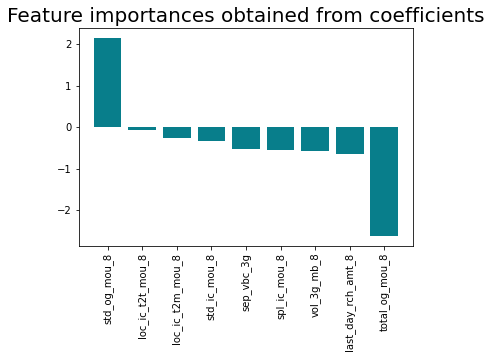

In [119]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [120]:
final_result = [['Model', 'Sensitivity', 'Specificity'], 
         ['XGBoost', sensitivity_initial_train_xgb, specificity_initial_train_xgb], 
         ['Random Forest', sensitivity_initial_train_rf, specificity_initial_train_rf]]

print(tabulate(final_result, headers='firstrow', tablefmt='grid'))

+---------------+---------------+---------------+
| Model         |   Sensitivity |   Specificity |
+===============+===============+===============+
| XGBoost       |      0.76296  |      0.746566 |
+---------------+---------------+---------------+
| Random Forest |      0.758086 |      0.826761 |
+---------------+---------------+---------------+


# Conclusion :

- I've performed Xtreme Gradient Boosting `(XGBoost)`
    - using `PCA` (for Dimentionality Reduction)
    - `NearMiss` Undersampling (To treat imbalance in dataset for majority class)
    
    
- And `Random Forest` 
    - using `PCA` (for Dimentionality Reduction) and 
    - `NearMiss` Undersampling (To treat imbalance in dataset for majority class).
    

- Logistic Regression
    - For indentifying top features

# Focus

- I've evaluated the Model on `Sensitivity` and `Accuracy` as we're more focusing on High value churned customers ( Class : 1) as they are more likely to contribute in revenue generation.

# Model Selected : XGBoost 

- We're going to select XGBoost on `Sensitivity` as its have higher sensitivity ( 0.762 ) than and Random Forest and Sensitivity is very important while predicting Churned Customers and it's the ability of a model to correctly identify customers that are going to churn.

In [121]:
final_result = [['Model', 'Sensitivity', 'Specificity', 'Accuracy'], 
         ['XGBoost', sensitivity_initial_train_xgb, specificity_initial_train_xgb, accuracy_score(y_test, y_test_pred)], 
         ['Random Forest', sensitivity_initial_train_rf, specificity_initial_train_rf, accuracy_score(y_test, y_test_pred_rf)]]

print(tabulate(final_result, headers='firstrow', tablefmt='grid'))

+---------------+---------------+---------------+------------+
| Model         |   Sensitivity |   Specificity |   Accuracy |
+===============+===============+===============+============+
| XGBoost       |      0.76296  |      0.746566 |   0.869328 |
+---------------+---------------+---------------+------------+
| Random Forest |      0.758086 |      0.826761 |   0.883007 |
+---------------+---------------+---------------+------------+


## Top Features after Logistic Regression

- std_og_mou_action_phase
- loc_ic_t2t_mou_action_phase
- loc_ic_t2m_mou_action_phase
- std_ic_mou_action_phase
- std_ic_mou_action_phase
- sep_vbc_3g
- spl_ic_mou_action_phase
- vol_3g_mb_action_phase
- last_day_rch_amt_action_phase
- total_og_mou_action_phase

# Business recommendation : 
- Company should more focus on `action phase` features like Incoming calls minutes of usage, outgoing calls minutes of usage, data usage both 2g and 3g as they are the indicators of customer is going to churn or not.